## <span style="color:blue"><u>Index</u></span>


#### [1.Importing Libraries](#ImportingLibraries)

#### [2.Understanding Data](#UnderstandingData)
#### [3.Performing EDA](#PerformingEDA)
#### [4.Cleaning And Preparing Data](#CleaningAndPreparingData)
#### [5.Model Building (Multiple Linear Regression)](#ModelBuilding)
#### [6.Verify Assumptions](#VerifyAssumptions)
#### [7.Prediction Using Final Models](#PredictionUsingFinalModel)
#### [8.Model Evaluation](#ModelEvaluation)
#### [9.Ridge Regression](#RidgeRegression)
#### [10.Lasso Regression](#LassoRegression)
#### [11.Comparision between Linear, Ridge and lasso Regression](#Comparision)
#### [12.Overall Observations Summary](#OverallObservationsSummary)

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## 1.  Importing Libraries<a class="anchor" id="ImportingLibraries"></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## 2.Understanding Data<a class="anchor" id="UnderstandingData"></a>

In [72]:
# Loading data
housePrice_data = pd.read_csv("train.csv")
housePrice_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
#check the shape of data .i.e columns and rows
housePrice_data.shape

(1460, 81)

In [74]:
# Check for column details like name and datatypes
housePrice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
# Get the description of the dataset
housePrice_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
# Checking the percentage of Null values in all the columns

def DiplayMissingValueColumns():
    print('Percentage of Missing Values in each column:')
    print(round(housePrice_data.isnull().sum()/len(housePrice_data.index)*100,2).sort_values(ascending=False)[round(housePrice_data.isnull().sum()/len(housePrice_data.index),2) > 0 ] )

DiplayMissingValueColumns()

Percentage of Missing Values in each column:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


Only the above displayed columns have missing values in them, so lets go ahead and remove the columns that have more than 40% as missing percentage

## 3.Performing EDA<a class="anchor" id="PerformingEDA"></a>

### Understanding the correlation between all the numerical variables

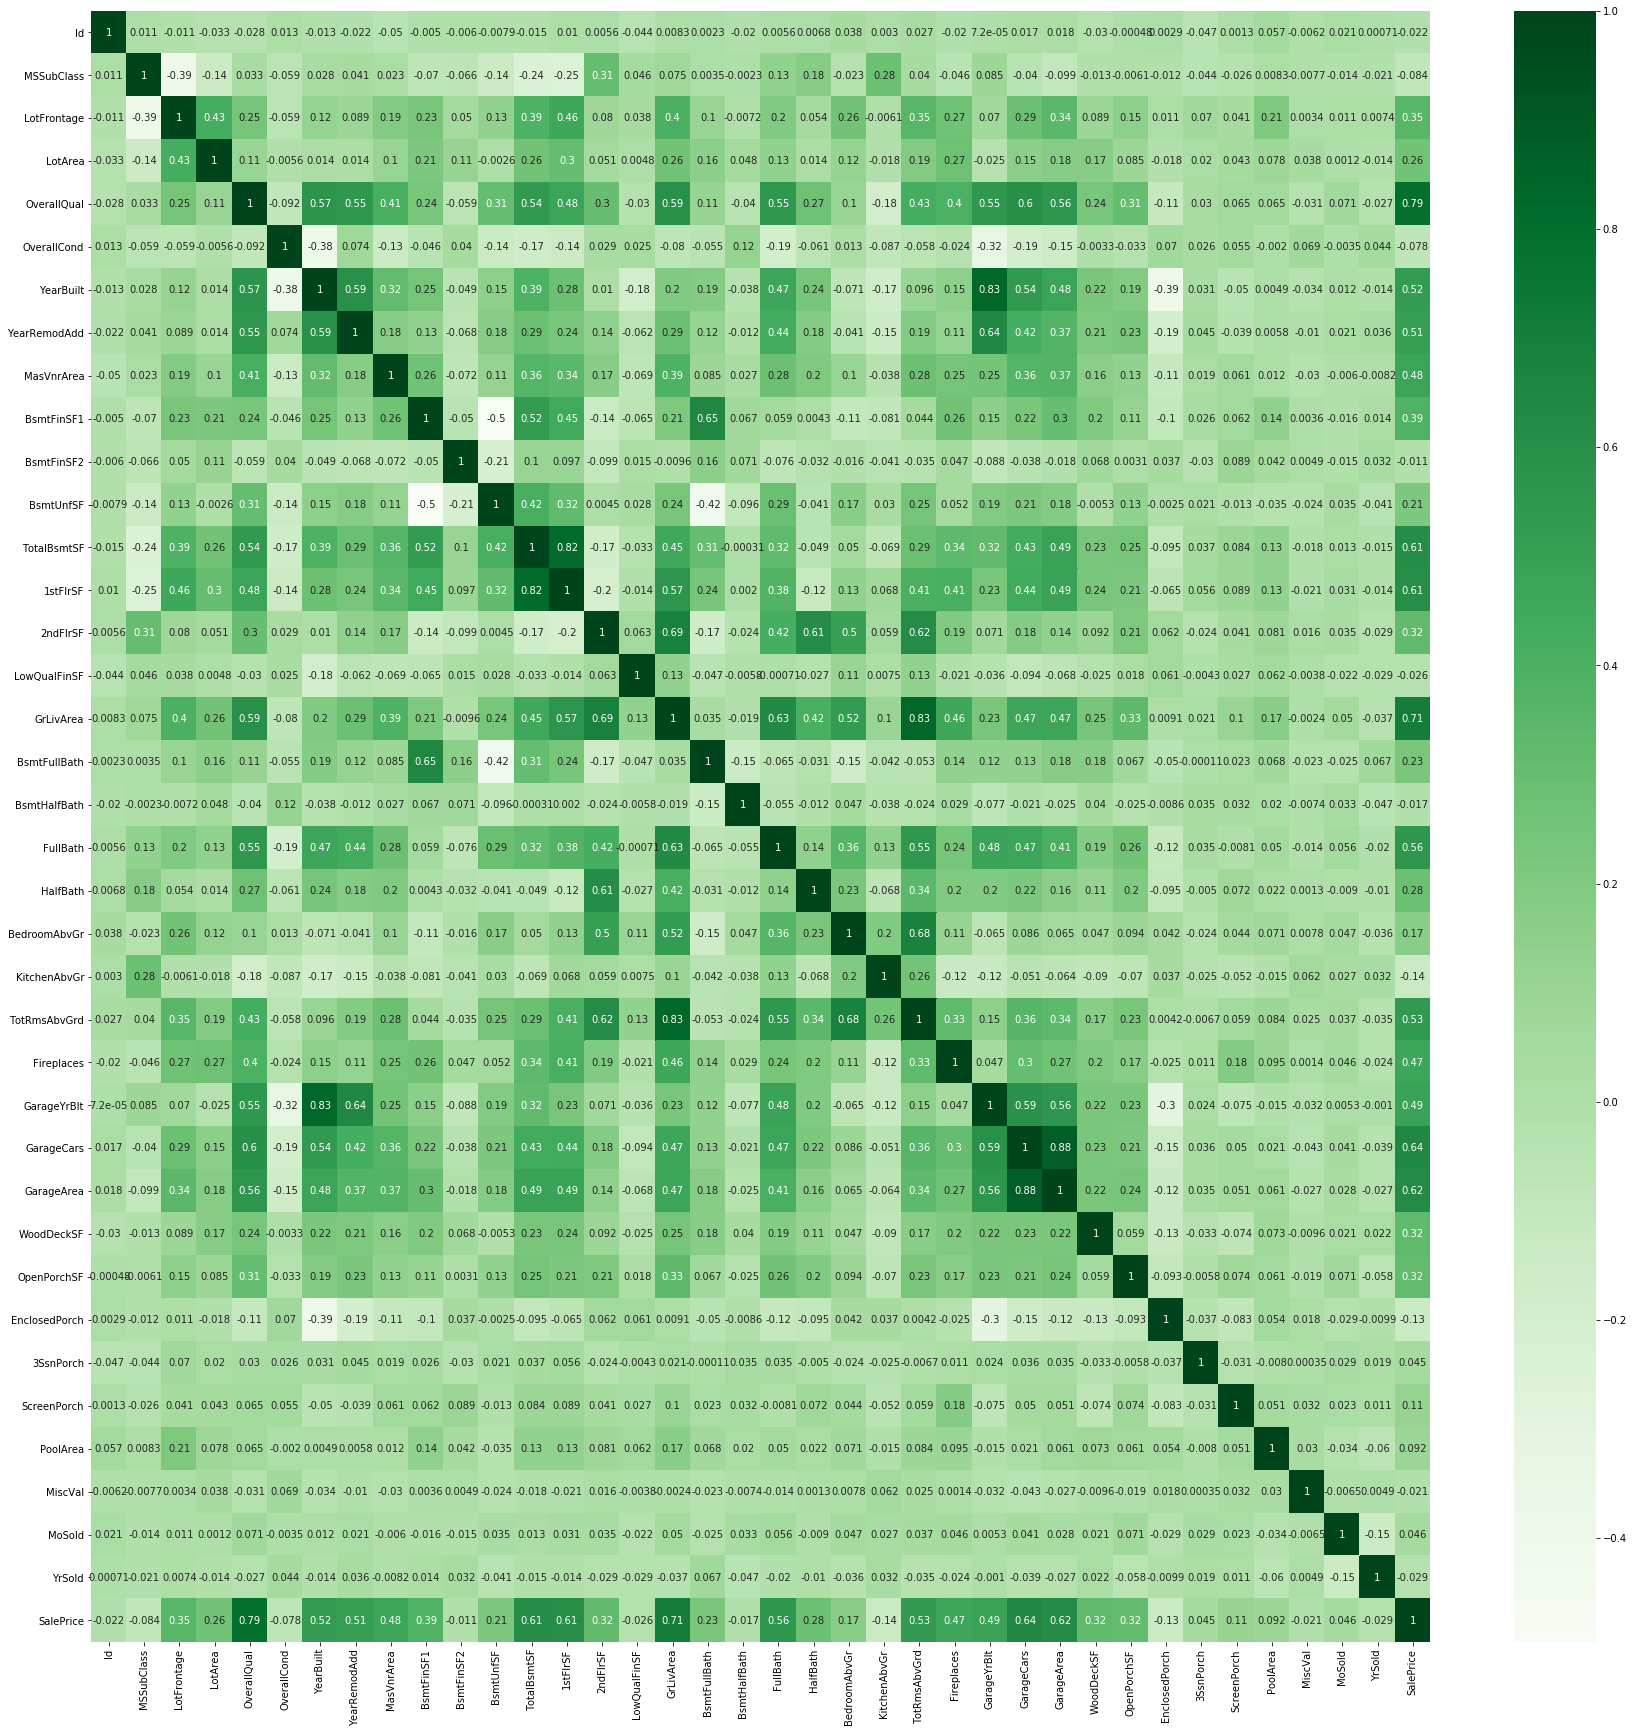

In [77]:
# plotting correlations on a heatmap
plt.figure(figsize = (30,30))
sns.heatmap(housePrice_data.corr(), annot = True,cmap="Greens")
plt.show()

#### Below are few of the observations:
- YearBuilt & YearRemoddAdd are highly correlated with GarageYrBuilt
- EnclosedPorch and YearBuilt are inversely proportional
- TotalBsmtSF and 1stFlrSF are highly correlated
- OverallQual and SalePrice are highly correlated
- GrLivArea and TotRmsAbvGrd have proportional relation

<Figure size 720x360 with 0 Axes>

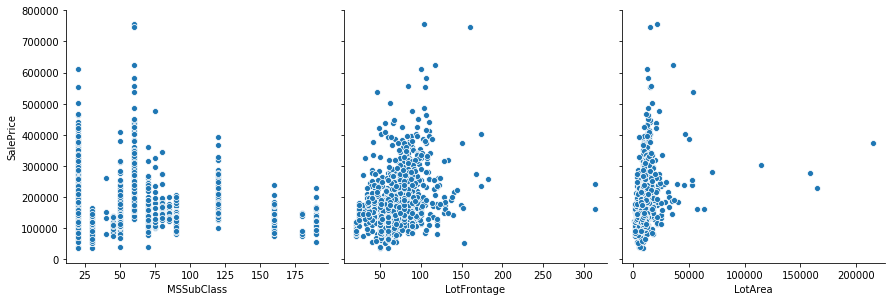

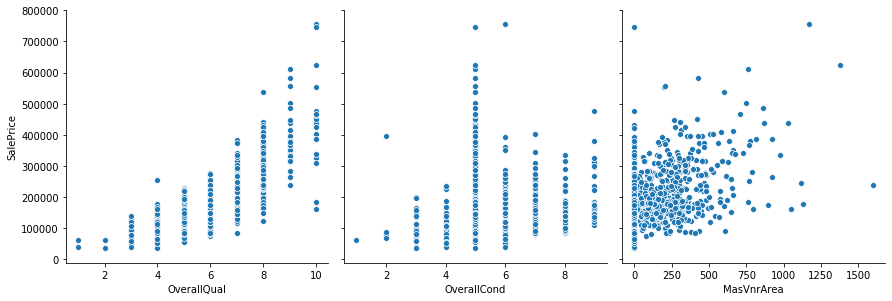

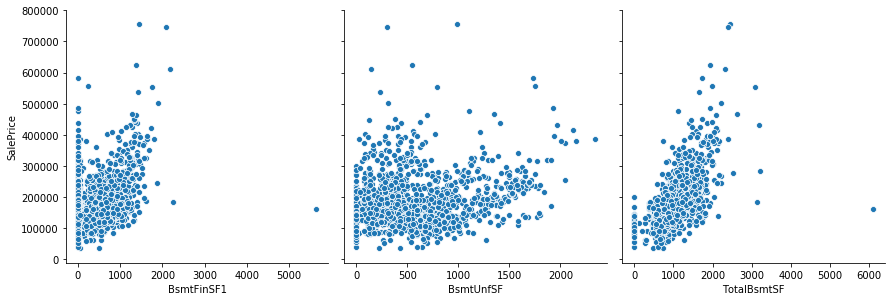

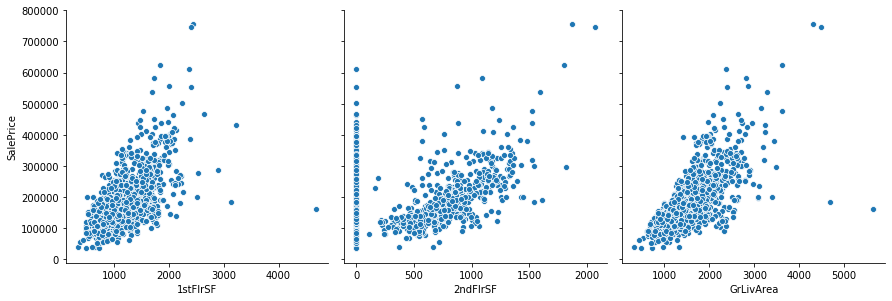

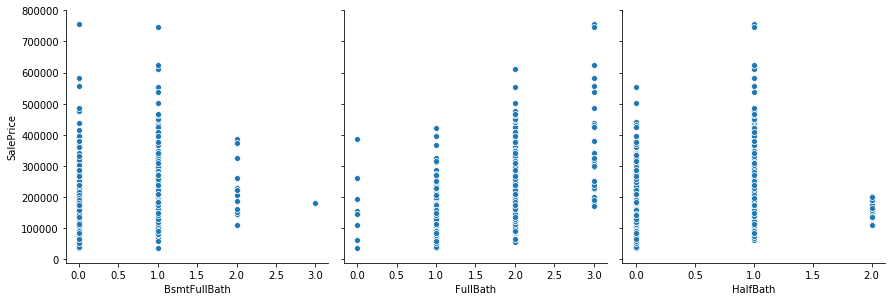

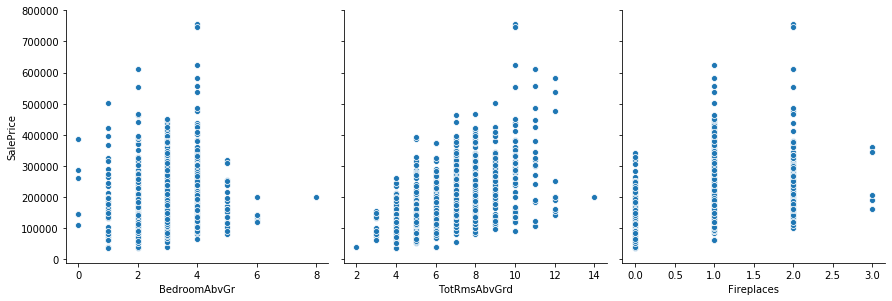

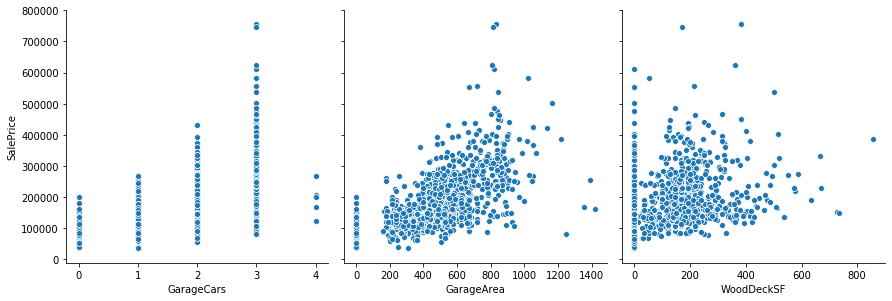

In [78]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housePrice_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housePrice_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housePrice_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housePrice_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housePrice_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housePrice_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housePrice_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

#### Observations : - 1stFlrSF, GrLivArea, GarageArea and TotalBsmtSF are having good correlation with SalePrice

### BoxPlot to visualize the relationship between target variable and other categorical independent variables


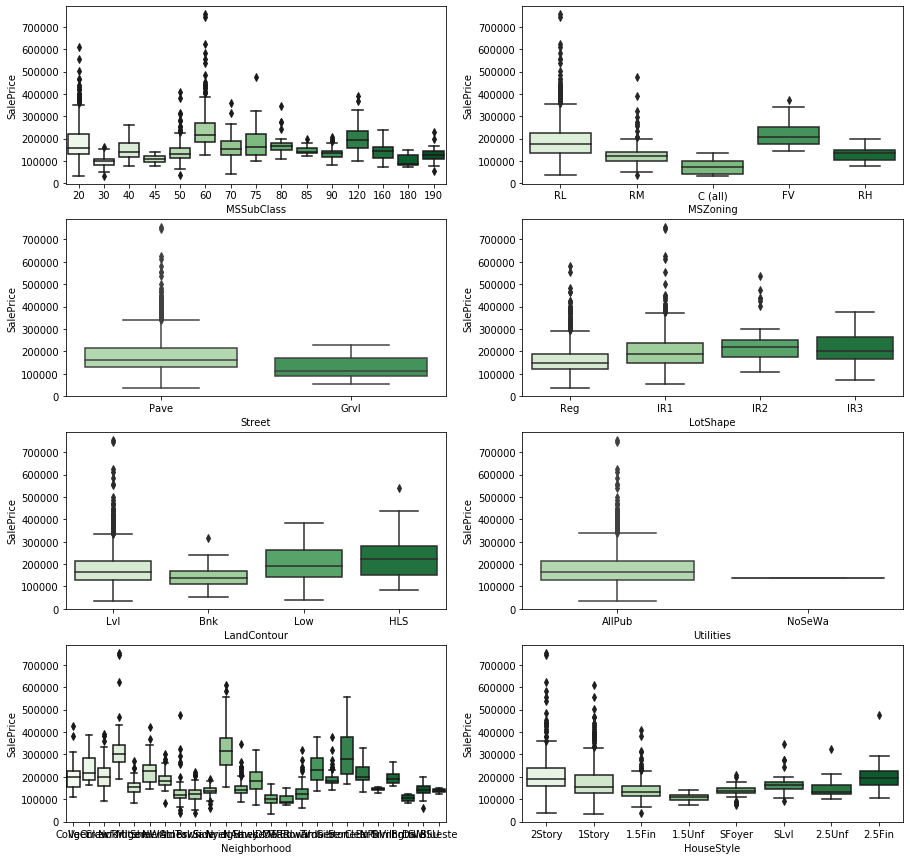

In [79]:

plt.figure(figsize=(15, 15))
for var in enumerate(['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','Neighborhood','HouseStyle']):
    plt.subplot(4,2,var[0]+1)
    sns.boxplot(data=housePrice_data, x=var[1], y='SalePrice',palette="Greens")
plt.show()

#### Below are few of the observations:
- MSSubClass 60 houses have high SalePrice compared to others
- MSZoning RF and PV has high SalePrice compared to RM and RH
- Houses with Paved streets prove to be more valueable
- On a broader level there are more number of 1Story and 2Story houses, which sales with more price tag

## 4.Cleaning And Preparing Data<a class="anchor" id="CleaningAndPreparingData"></a>

### Imputing other missing values in columns

In [80]:
#Removing the Dropping the Columns with more than 40% missing values
# i.e PoolQC, MiscFeature, Alley, Fence, FireplaceQu

housePrice_data = housePrice_data.loc[:,(100*housePrice_data.isnull().sum()/housePrice_data.shape[0]).sort_values(ascending = False) < 40]
housePrice_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [81]:
# Checking the percentage of Null values in all the columns

def DiplayMissingValueColumns():
    print('Percentage of Missing Values in each column:')
    print(round(housePrice_data.isnull().sum()/len(housePrice_data.index)*100,2).sort_values(ascending=False)[round(housePrice_data.isnull().sum()/len(housePrice_data.index),2) > 0 ] )

DiplayMissingValueColumns()

Percentage of Missing Values in each column:
LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
dtype: float64


### Imputing Categorical Columns

In [82]:
#replace 'NAN' values of all the below categorical columns with NA i.e. No as the value

# Function to impute the missing values with NA
def HandleMissingValues(columnNames):
    for i in columnNames:
        housePrice_data[i] = housePrice_data[i].fillna('NA')

HandleMissingValues(["GarageCond","GarageType","GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual","MasVnrType"])

#Imputing missing values of Electrical with MODE asSBrkr has occured 1334 times
housePrice_data.Electrical = housePrice_data.Electrical.fillna(housePrice_data.Electrical.mode()[0]) 

In [83]:
# Checking the percentage of Null values in all the columns
DiplayMissingValueColumns()

Percentage of Missing Values in each column:
LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64


### Imputing Numerical Columns

In [84]:
#imputing the missing values of LotFrontage with median because of some outliers as per description analysis

housePrice_data.LotFrontage = housePrice_data.LotFrontage.fillna(housePrice_data.LotFrontage.median())
housePrice_data.MasVnrArea = housePrice_data.MasVnrArea.fillna(housePrice_data.MasVnrArea.median())    
housePrice_data.GarageYrBlt = housePrice_data.GarageYrBlt.fillna(0) 


In [85]:
# Checking the percentage of Null values in all the columns
DiplayMissingValueColumns()

Percentage of Missing Values in each column:
Series([], dtype: float64)


### Converting columns to respective datatypes 

In [86]:
#Converting MSSubClass into object type, as its a categorical columns
housePrice_data = housePrice_data.astype({'MSSubClass':object})

### Converting column values to their respective code from 0,1,2,3,4,5... format for easy readeability

In [87]:
def AssigningValues(data):
    ousePrice_data = housePrice_data.replace(data)

AssigningValues({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
AssigningValues({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
AssigningValues({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


### Deriving a new column

Derive the age of the house i.e. TotalHouseAge from YrSold - YearBuilt 

In [88]:

housePrice_data['TotalHouseAge'] = housePrice_data.YrSold - housePrice_data.YearBuilt

#Droping the YrSold and YearBuilt as we have that same info in TotalHouseAge column
housePrice_data=housePrice_data.drop(columns=['YrSold', 'YearBuilt'])

### Lets check for the columns that have high bias .i.e most of the values in column are same like around 80%

In [89]:
#Fetching all the object type columns along with their values and the weightage
for col in housePrice_data.columns:
    if housePrice_data[col].dtype == np.object :
        print('Columnn : ',col)
        print(housePrice_data[col].value_counts(normalize=True))

Columnn :  MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
Columnn :  MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Columnn :  Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Columnn :  LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
Columnn :  LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Columnn :  Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Columnn :  LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: flo

In [90]:
#Dropping the biased columns, conditions atleast 80%
housePrice_data=housePrice_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

### Dummy Encoding


Fetch all object type categorical columns

In [91]:
cat_columns = []
for col in housePrice_data.columns:
    if housePrice_data[col].dtype == np.object:
        cat_columns.append(col)
print('Categorical Columns List :\n',cat_columns)

Categorical Columns List :
 ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']


#### Create dummy variables for object type columns

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 
'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
'KitchenQual', 'GarageType', 'GarageFinish']

In [92]:
def createDummyVariables(col,df):
        col_df = pd.get_dummies(df[col],drop_first=True, prefix=col)
        col_df.head()
        return col_df
        
for col in cat_columns:
    housePrice_data = pd.concat([housePrice_data,createDummyVariables(col,housePrice_data)],axis=1)
    

In [93]:
#Shape after adding dummy variables
housePrice_data.shape

(1460, 186)

In [94]:
#Droping categorical object type variables after ceating dummy varaibles
housePrice_data=housePrice_data.drop(columns=cat_columns)

In [95]:
#Final data
housePrice_data.shape

(1460, 167)

## 5.Model Building<a class="anchor" id="ModelBuilding"></a>

### Train-Test Data Preparation For Model Building


In [96]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(housePrice_data,train_size=0.70,random_state=50)
print(train_data.shape)
print(test_data.shape)

(1021, 167)
(439, 167)


### Scaling the numerical columns

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#list of numeric columns excluding the dummy variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'TotRmsAbvGrd', 'Fireplaces'
           , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'TotalHouseAge']

#fit_transform on train data
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])
train_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1408,-0.425441,-0.260972,-1.501313,1.254465,-1.679511,-0.576477,-0.943682,-0.283127,0.125599,-0.973611,...,1,0,0,0,0,1,0,0,0,1
1148,-0.027378,-0.439708,0.660663,1.254465,-1.679511,-0.576477,-0.943682,-0.283127,0.011664,-1.087319,...,1,0,0,0,0,1,0,0,0,1
861,0.237997,0.079416,-0.780655,-1.406495,-0.957538,-0.576477,0.869867,-0.283127,-0.840571,-0.025287,...,1,1,0,0,0,0,0,0,0,1
220,0.149539,-0.151452,0.660663,-0.519508,1.015852,-0.576477,-0.943682,-0.283127,2.121742,1.018550,...,0,1,0,0,0,0,0,0,1,0
1362,-0.027378,0.157219,-1.501313,-1.406495,1.063984,-0.576477,-0.943682,-0.283127,0.337518,-0.762114,...,1,1,0,0,0,0,0,0,0,1


### Creating a Linear Regression Model

In [98]:
#creating X_train,y_train 

y_train = train_data.pop('SalePrice')
X_train = train_data

### Using RFE For Feature Selection

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [99]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)
rfe = rfe.fit(X_train,y_train)

In [100]:
# Check the supported columns and their flags
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('LotFrontage', False, 96),
 ('LotArea', False, 77),
 ('OverallQual', False, 12),
 ('OverallCond', False, 69),
 ('YearRemodAdd', False, 106),
 ('MasVnrArea', False, 80),
 ('BsmtFinSF1', False, 8),
 ('BsmtFinSF2', False, 10),
 ('BsmtUnfSF', False, 11),
 ('TotalBsmtSF', False, 9),
 ('1stFlrSF', False, 15),
 ('2ndFlrSF', False, 14),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 91),
 ('BsmtHalfBath', False, 141),
 ('FullBath', False, 82),
 ('HalfBath', False, 138),
 ('BedroomAbvGr', False, 83),
 ('KitchenAbvGr', False, 88),
 ('TotRmsAbvGrd', False, 84),
 ('Fireplaces', False, 124),
 ('GarageYrBlt', False, 122),
 ('GarageCars', False, 51),
 ('GarageArea', False, 90),
 ('WoodDeckSF', False, 110),
 ('OpenPorchSF', False, 142),
 ('EnclosedPorch', False, 120),
 ('3SsnPorch', False, 113),
 ('ScreenPorch', False, 107),
 ('PoolArea', False, 112),
 ('MiscVal', False, 131),
 ('MoSold', False, 117),
 ('TotalHouseAge', False, 65),
 ('MSSubClass_30', False, 98),
 ('M

In [101]:
#Final selected/supported columns from RFE
final_col = X_train.columns[rfe.support_]
print(final_col)

Index(['GrLivArea', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_ImStucc',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_NA', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA'],
      dtype='object')


In [102]:
#Function to build a model using statsmodel api

def create_model(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm,X_train_sm

#Function to calculate VIFs and print them
def fetch_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1

In [103]:
#Creating X_train with RFE selected independent columns
X_train_rfe = X_train[final_col]
lr1,X_train_sm=create_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:36   Log-Likelihood:                -12107.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     996   BIC:                         2.439e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.895e+05 

In [104]:
#Print the VIF values
fetch_vif(X_train_rfe)

                Features    VIF
21       BsmtFinType1_NA    inf
18           BsmtQual_NA    inf
15          ExterQual_TA  25.49
24        KitchenQual_TA  17.65
19           BsmtQual_TA  12.12
23        KitchenQual_Gd  11.80
14          ExterQual_Gd  11.41
17           BsmtQual_Gd   9.63
3            MSZoning_RL   5.90
22        KitchenQual_Fa   1.94
13          ExterQual_Fa   1.72
16           BsmtQual_Fa   1.62
0              GrLivArea   1.50
2            MSZoning_FV   1.47
1         MSSubClass_160   1.30
5   Neighborhood_NoRidge   1.28
6   Neighborhood_NridgHt   1.26
11   Exterior1st_ImStucc   1.24
12   Exterior2nd_ImStucc   1.24
20       BsmtExposure_Gd   1.18
10    Exterior1st_CBlock   1.16
7   Neighborhood_StoneBr   1.11
8      HouseStyle_2.5Fin   1.09
4           LotShape_IR3   1.05
9    Exterior1st_BrkComm   1.00


### Model 2

In [105]:
#Removing the variable 'Exterior2nd_CBlock' based on its High VIF
X_train_new = X_train_rfe.drop(["BsmtFinType1_NA"], axis = 1)

In [106]:
lr2,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:38   Log-Likelihood:                -12107.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     996   BIC:                         2.439e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.895e+05 

### Model 3

In [107]:
#Removing the variable 'ExterQual_TA' based on its High VIF
X_train_new = X_train_new.drop(["ExterQual_TA"], axis = 1)

In [108]:
#Print the VIF values
lr3,X_train_sm=create_model(X_train_new)
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:39   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.430e+04
Df Residuals:                     997   BIC:                         2.442e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.598e+05 

### Model 4

In [109]:
#Removing the variable 'KitchenQual_TA' based on its High VIF
X_train_new = X_train_new.drop(["KitchenQual_TA"], axis = 1)

In [110]:
#Print the VIF values
lr4,X_train_sm=create_model(X_train_new)
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          1.06e-320
Time:                        17:42:40   Log-Likelihood:                -12187.
No. Observations:                1021   AIC:                         2.442e+04
Df Residuals:                     998   BIC:                         2.453e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.167e+05 

### Model 5

In [111]:
#Removing the variable 'ExterQual_Fa' based on its High P value
X_train_new = X_train_new.drop(["ExterQual_Fa"], axis = 1)

In [112]:
lr5,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          7.81e-322
Time:                        17:42:40   Log-Likelihood:                -12187.
No. Observations:                1021   AIC:                         2.442e+04
Df Residuals:                     999   BIC:                         2.453e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.166e+05 

### Model 6

In [113]:
#Removing the variable 'Exterior1st_ImStucc' based on its High P value
X_train_new = X_train_new.drop(["KitchenQual_Gd"], axis = 1)

In [114]:
lr6,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          9.39e-323
Time:                        17:42:41   Log-Likelihood:                -12187.
No. Observations:                1021   AIC:                         2.442e+04
Df Residuals:                    1000   BIC:                         2.452e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.167e+05 

### Model 7

In [115]:
#Removing the variable 'LotConfig_FR3' based on its High P value
X_train_new = X_train_new.drop(["Exterior1st_ImStucc"], axis = 1)

In [116]:
lr7,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          9.88e-324
Time:                        17:42:42   Log-Likelihood:                -12187.
No. Observations:                1021   AIC:                         2.441e+04
Df Residuals:                    1001   BIC:                         2.451e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.169e+05 

### Model 8

In [117]:
#Removing the variable 'Exterior1st_CBlock' based on its High P value
X_train_new = X_train_new.drop(["Exterior1st_CBlock"], axis = 1)

In [118]:
lr8,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:43   Log-Likelihood:                -12188.
No. Observations:                1021   AIC:                         2.441e+04
Df Residuals:                    1002   BIC:                         2.451e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  2.17e+05 

### Model 9

In [119]:
#Removing the variable 'KitchenQual_TA' based on its High VIF
X_train_new = X_train_new.drop(["MSZoning_RL"], axis = 1)

In [120]:
lr9,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          6.90e-315
Time:                        17:42:46   Log-Likelihood:                -12214.
No. Observations:                1021   AIC:                         2.446e+04
Df Residuals:                    1003   BIC:                         2.455e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.372e+05 

## 6.Verify Assumptions<a class="anchor" id="VerifyAssumptions"></a>


### Residual Analysis

In [121]:
#Find the y_train_pred using the final model
y_train_pred = lr9.predict(X_train_sm)
y_train_pred

1408    121149.397971
1148    123470.594253
861     118265.920193
220     190195.521473
1362    168794.630857
            ...      
229     194315.888437
70      260947.955970
132     139084.616432
1313    325055.876143
109     198302.731675
Length: 1021, dtype: float64

Text(0.5, 0, 'Errors')

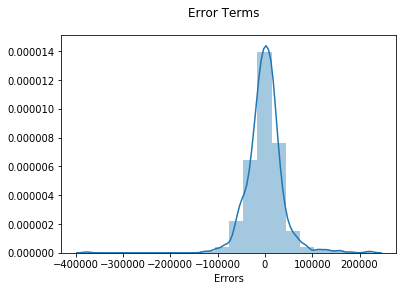

In [122]:
res = y_train-y_train_pred
# Plot the error terms histogram
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')

#### From above plot we can say that Error terms are normally distributed here with mean 0

### Actual Vs Predicted Values


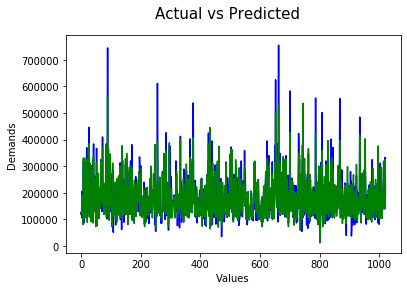

In [123]:
# Actual vs Predicted Values
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Values')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted Values are almost the same and are representing the same pattern

## 7.Prediction Using Final Model<a class="anchor" id="PredictionUsingFinalModel"></a>

Applying scaler() to all numeric independent variables in test dataset. 

Note: we will only use scaler.transform as we want to match the model input but dont want the model to learn the data

In [124]:
test_data[num_vars] = scaler.transform(test_data[num_vars])
test_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
930,0.149539,-0.157147,1.381321,-0.519508,1.063984,-0.576477,-0.909179,-0.283127,2.012364,0.945777,...,0,1,0,0,0,0,0,0,0,0
530,0.680289,-0.045437,-0.059996,-0.519508,0.197617,0.661455,0.744795,-0.283127,0.253206,0.934407,...,0,1,0,0,0,0,0,0,1,0
1291,-2.150379,-0.791924,-0.780655,1.254465,-0.620618,0.938435,-0.445549,-0.283127,-0.382552,-0.955417,...,1,0,0,0,0,1,0,0,0,1
1385,-1.310024,-0.462839,-1.501313,2.141452,1.063984,-0.576477,0.641287,-0.283127,-1.152753,-0.577907,...,0,0,0,0,0,1,0,0,0,1
305,0.459143,-0.029140,1.381321,-0.519508,0.967721,0.814076,2.213317,-0.283127,-0.070370,2.160177,...,0,1,0,0,0,0,0,0,0,0


In [125]:
#creating y_test and X_test
y_test = test_data.pop('SalePrice')
X_test = test_data

In [126]:
y_test

930     201000
530     175000
1291    119500
1385    125500
305     305900
         ...  
1078    155900
1244    230000
406     115000
1459    147500
175     243000
Name: SalePrice, Length: 439, dtype: int64

In [127]:
#Display model columns
X_train_new.columns

Index(['GrLivArea', 'MSSubClass_160', 'MSZoning_FV', 'LotShape_IR3',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior2nd_ImStucc',
       'ExterQual_Gd', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa'],
      dtype='object')

#### Now let's use our model to make predictions.

In [128]:
X_test_final = X_test[X_train_new.columns]
X_test_final = sm.add_constant(X_test_final)
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 930 to 175
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 439 non-null    float64
 1   GrLivArea             439 non-null    float64
 2   MSSubClass_160        439 non-null    uint8  
 3   MSZoning_FV           439 non-null    uint8  
 4   LotShape_IR3          439 non-null    uint8  
 5   Neighborhood_NoRidge  439 non-null    uint8  
 6   Neighborhood_NridgHt  439 non-null    uint8  
 7   Neighborhood_StoneBr  439 non-null    uint8  
 8   HouseStyle_2.5Fin     439 non-null    uint8  
 9   Exterior1st_BrkComm   439 non-null    uint8  
 10  Exterior2nd_ImStucc   439 non-null    uint8  
 11  ExterQual_Gd          439 non-null    uint8  
 12  BsmtQual_Fa           439 non-null    uint8  
 13  BsmtQual_Gd           439 non-null    uint8  
 14  BsmtQual_NA           439 non-null    uint8  
 15  BsmtQual_TA          

In [129]:
#Running the Linear Model
#Predict the values for test data
y_test_pred = lr9.predict(X_test_final)

In [130]:
y_test_pred.head()

930     187882.333002
530     190990.680010
1291     95761.721293
1385    126578.941261
305     226483.665612
dtype: float64

## 8. Model Evaluation<a class="anchor" id="ModelEvaluation"></a>

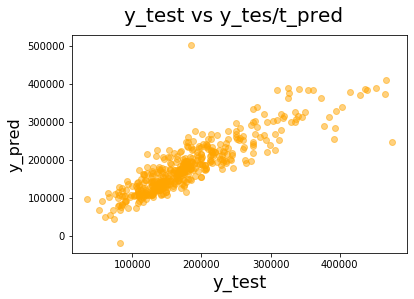

In [131]:
#Verifying the actual and predivted values spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5,color="orange")
fig.suptitle('y_test vs y_tes/t_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### We can observe that y_test and y_test_pred are in allign


### R-Squared value for test data predictions

In [132]:
r2=r2_score(y_test,y_test_pred)
r2

0.7614158427656212

### R-Squared Adjusted value for test data predictions

In [133]:
# n is number of rows in X
n = X_test_final.shape[0]

# Number of features
p = X_test_final.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7511908074555764

### Comparision between Training and Testing dataset

- Train dataset R^2 : 0.798
- Test dataset R^2 : 0.78
- Train dataset Adjusted R^2 : 0.776
- Test dataset Adjusted R^2 : 0.751

#### R2 score has negligible difference, so we can infer this is the good to go model

## 9. Ridge Regression<a class="anchor" id="RidgeRegression"></a>

In [134]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0,6.0,7.0,8.0,9.0, 10.0, 20, 50,60,70,80,90, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation process
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 60, 70, 80, 90,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [135]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [136]:
#Creating the results dataframe.
cv_results = pd.DataFrame(model_cv.cv_results_)
#reading the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005987,0.003538,0.000199,0.000399,0.0001,{'alpha': 0.0001},-28579.879982,-23181.632991,-24289.717558,-30884.010051,...,-26743.892953,2800.918331,16,-25301.323964,-26429.528354,-26540.009501,-24533.598958,-25775.580304,-25716.008216,743.194809
1,0.005484,0.003602,0.004327,0.003262,0.001,{'alpha': 0.001},-28579.561318,-23181.461300,-24289.123522,-30884.130106,...,-26743.515493,2801.057178,15,-25301.280658,-26429.477636,-26539.965626,-24533.515821,-25775.559572,-25715.959863,743.206296
2,0.001877,0.002302,0.001703,0.002507,0.01,{'alpha': 0.01},-28576.376707,-23179.807124,-24283.192932,-30885.328008,...,-26739.763637,2802.429711,14,-25300.839672,-26428.964087,-26539.518453,-24532.685428,-25775.343028,-25715.470133,743.318518
3,0.000804,0.001607,0.002938,0.003675,0.05,{'alpha': 0.05},-28562.267838,-23172.484466,-24257.046605,-30890.594430,...,-26723.313882,2808.521341,13,-25298.724258,-26427.035033,-26537.359694,-24529.015937,-25774.187673,-25713.264519,743.854982
4,0.003148,0.005341,0.000199,0.000398,0.1,{'alpha': 0.1},-28544.735736,-23163.403109,-24224.837158,-30897.048354,...,-26703.248339,2816.109042,12,-25295.935175,-26425.102484,-26534.854264,-24524.476612,-25772.341841,-25710.542075,744.655160


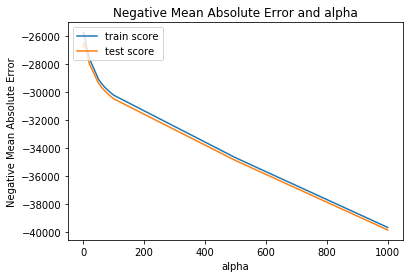

In [137]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [138]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)

# Method to get the coefficient values

ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train_new.columns))
ridge_coeff_dict

{'GrLivArea': 38432.23171739467,
 'MSSubClass_160': -40136.85612724523,
 'MSZoning_FV': 29175.500389792327,
 'LotShape_IR3': -30041.871930686782,
 'Neighborhood_NoRidge': 53047.08895184835,
 'Neighborhood_NridgHt': 61763.9155255193,
 'Neighborhood_StoneBr': 66605.03842014009,
 'HouseStyle_2.5Fin': -62138.52463593441,
 'Exterior1st_BrkComm': -37606.93623304896,
 'Exterior2nd_ImStucc': 35744.80354695586,
 'ExterQual_Gd': 18002.939247370312,
 'BsmtQual_Fa': -95857.44454374244,
 'BsmtQual_Gd': -57988.529795619215,
 'BsmtQual_NA': -103602.55190114137,
 'BsmtQual_TA': -79281.82709362333,
 'BsmtExposure_Gd': 35942.587649853616,
 'KitchenQual_Fa': -27243.8814777096}

In [139]:
#drop the const
X_test_final = X_test_final.drop(['const'], axis=1)

In [140]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_final)

#### Calculate R Square for Train Data

In [141]:
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

0.7788987808170149


#### Calculate R Square for Test Data

In [142]:
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7677597762414556


## 9. Lasso Regression<a class="anchor" id="LassoRegression"></a>

In [143]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 60, 70, 80, 90,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [144]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [145]:
#Creating the results dataframe.
cv_results = pd.DataFrame(model_cv.cv_results_)
#reading the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005459,0.003850,0.002673,0.002931,0.0001,{'alpha': 0.0001},-28579.914927,-23181.651936,-24289.782941,-30883.996756,...,-26743.934497,2800.902998,27,-25301.328703,-26429.533882,-26540.014252,-24533.608075,-25775.582502,-25716.013483,743.193530
1,0.007571,0.001208,0.001691,0.002119,0.001,{'alpha': 0.001},-28579.910749,-23181.649619,-24289.777259,-30883.997183,...,-26743.930605,2800.904139,26,-25301.328121,-26429.532978,-26540.013225,-24533.606979,-25775.581641,-25716.012589,743.193528
2,0.005420,0.003298,0.000213,0.000426,0.01,{'alpha': 0.01},-28579.868977,-23181.626440,-24289.720436,-30884.001468,...,-26743.891686,2800.915561,25,-25301.322306,-26429.523940,-26540.002950,-24533.596028,-25775.573034,-25716.003652,743.193510
3,0.003523,0.007045,0.000000,0.000000,0.05,{'alpha': 0.05},-28579.683322,-23181.523537,-24289.467884,-30884.020394,...,-26743.718709,2800.966264,24,-25301.296463,-26429.483727,-26539.957314,-24533.547344,-25775.534772,-25715.963924,743.193430
4,0.006678,0.008178,0.000000,0.000000,0.1,{'alpha': 0.1},-28579.451213,-23181.394842,-24289.152204,-30884.044036,...,-26743.502479,2801.029655,23,-25301.264145,-26429.433486,-26539.900204,-24533.486488,-25775.486982,-25715.914261,743.193324


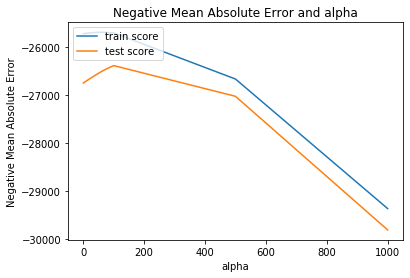

In [146]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [147]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)


Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [148]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_new.columns))
lasso_coeff_dict

{'GrLivArea': 38387.02058151359,
 'MSSubClass_160': -37316.21378448333,
 'MSZoning_FV': 26059.535558591422,
 'LotShape_IR3': -21094.186181945806,
 'Neighborhood_NoRidge': 51937.30959056557,
 'Neighborhood_NridgHt': 60786.178868601986,
 'Neighborhood_StoneBr': 64502.781721585845,
 'HouseStyle_2.5Fin': -54461.94490709967,
 'Exterior1st_BrkComm': -0.0,
 'Exterior2nd_ImStucc': 24754.503453591842,
 'ExterQual_Gd': 17943.91442348818,
 'BsmtQual_Fa': -96027.94072305528,
 'BsmtQual_Gd': -57674.60447437879,
 'BsmtQual_NA': -104090.97741397016,
 'BsmtQual_TA': -79595.66106585,
 'BsmtExposure_Gd': 35354.2601898522,
 'KitchenQual_Fa': -24271.174552296263}

In [149]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_final)

#### Calculate R Square for Train Data

In [150]:
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

0.7773952732084988


#### Calculate R Square for Test Data

In [151]:
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7724251767899255


## 10. Comparision between Linear, Ridge and lasso Regression<a class="anchor" id="Comparision"></a>

#### Linear Regression

- Train dataset R^2 : 0.798
- Test dataset R^2 : 0.780

#### Ridge Regression

- Train dataset R^2 : 0.778
- Test dataset R^2 : 0.767

#### Lasso Regression

- Train dataset R^2 : 0.777
- Test dataset R^2 : 0.772

## 11. Overall Observations Summary<a class="anchor" id="OverallObservationsSummary"></a>

- Based on the requirement, the company shouls focus on purchasing houses below the market value by concentrating more on the negative parameters.
- And by improving the above variables and mentioning the high valued positive variables while sellingthey can make profits
- Above grade (ground) living area square feet is contributing highly to the SalePrice
- Good and excellent exterior and basement quality is better sold
- Places in Northridge, Northridge Heights and Stone Brook locations are low in demand and thus sold slower and for lower rates
- 1 is the Optimum value for lambda in RIDGE regressiog
- 100 is the Optimum value for lambda in LASSO regression
